In [1]:
#gerekli kütüphaneler import edildi
import pandas as pd
import http.client
import json
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

from config import COVID19_API_KEY 

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#HTTP bağlantısı oluşutrma
conn = http.client.HTTPSConnection("covid-193.p.rapidapi.com")

In [4]:
#HTPP isteğinin başlıklarını belirleme
headers = {
    'X-RapidAPI-Key': COVID19_API_KEY,
    'X-RapidAPI-Host': "covid-193.p.rapidapi.com"
}

In [5]:
# İlk isteği gönder
conn.request("GET", "/statistics", headers=headers)

In [6]:
# Yanıtı al
res = conn.getresponse()

In [7]:
#HTTP yanıtını okuma ve Unicode formatına çevirme
data = res.read().decode("utf-8")

In [8]:
#JSON formatına çevirme
covid19_data = json.loads(data)

In [9]:
#gelen veri
covid19_data

{'get': 'statistics',
 'parameters': [],
 'errors': [],
 'results': 238,
 'response': [{'continent': 'North-America',
   'country': 'Montserrat',
   'population': 4965,
   'cases': {'new': None,
    'active': 19,
    'critical': None,
    'recovered': 1376,
    '1M_pop': '282578',
    'total': 1403},
   'deaths': {'new': None, '1M_pop': '1611', 'total': 8},
   'tests': {'1M_pop': '3577442', 'total': 17762},
   'day': '2023-12-28',
   'time': '2023-12-28T21:30:10+00:00'},
  {'continent': None,
   'country': 'Diamond-Princess',
   'population': None,
   'cases': {'new': None,
    'active': 0,
    'critical': None,
    'recovered': 699,
    '1M_pop': None,
    'total': 712},
   'deaths': {'new': None, '1M_pop': None, 'total': 13},
   'tests': {'1M_pop': None, 'total': None},
   'day': '2023-12-28',
   'time': '2023-12-28T21:30:10+00:00'},
  {'continent': 'Europe',
   'country': 'Vatican-City',
   'population': 799,
   'cases': {'new': None,
    'active': 0,
    'critical': None,
    'reco

# Veriyi İnceleme Aşaması

In [10]:
#sütun isimleri
print(covid19_data['response'][0].keys())

dict_keys(['continent', 'country', 'population', 'cases', 'deaths', 'tests', 'day', 'time'])


In [11]:
#vaka sayısı
covid19_data['response'][0]['cases']

{'new': None,
 'active': 19,
 'critical': None,
 'recovered': 1376,
 '1M_pop': '282578',
 'total': 1403}

In [12]:
#ölüm sayısı
covid19_data['response'][237]['deaths']

{'new': '+25', '1M_pop': '893.1', 'total': 6961398}

In [13]:
#test sayısı
covid19_data['response'][10]['tests']

#total: toplam test sayısı

{'1M_pop': '301094', 'total': 305941}

In [14]:
#veri sayısı
len(covid19_data['response'])

238

# Tüm bu değerlendirmeler göz önünde bulundurulduğunda oluşturacağım veri setindeki sütünlar şu şekilde olabilir:
- 'continent', 
- 'country', 
- 'population', 
- 'total_cases', 
- 'total_deaths', 
- 'total_tests', 
- 'cases_active',
- 'cases_critical',
- 'cases_recovered',

In [15]:
#toplam vaka, ölüm ve test
for item in covid19_data['response']:
    print(item['cases']['total'])
    print(item['deaths']['total'])
    print(item['tests']['total'])
    print("\n")

1403
8
17762


712
13
None


29
None
None


10
1
None


9
2
None


503302
5272
160000000


80
None
None


937
None
None


18491
225
None


17786
125
None


15690
189
305941


11971
21
164926


10189
103
23693


9931
312
254538


2166
None
None


1930
None
8632


17229
183
365697


8090
295
139824


5393
1
20509


11682
38
30126


18860
165
1029558


12626
372
155686


19693
238
182981


9109
161
None


9614
177
145231


7701
194
191341


12019
14
24976


11051
92
62056


3550
8
20508


5507
6
78646


6607
48
126958


5085
24
None


7766
126
259958


16138
17
None


20550
113
534283


12324
63
112382


11945
2159
329592


3904
12
51382


3452
2
25400


9106
146
18901


2943
1
None


17181
67
78646


7392
64
107339


7174
2
19690


16888
13
535009


9674
124
114197


6265
9
71077


15440
113
81294


21561
94
112457


18765
147
410280


20343
123
7850


16038
74
229344


16942
31
187397


6743
80
29473


6711
40
615226


45986
295
496693


38008
116
150753


31472
37
222773


25375
386
34

In [16]:
#aktif, kritik ve iyileşen covid 19 vaka sayısı
for item in covid19_data['response']:
    print(item['cases']['active'])
    print(item['cases']['critical'])
    print(item['cases']['recovered'])
    print("\n")

19
None
1376


0
None
699


0
None
29


0
None
9


0
None
7


118977
None
379053


80
None
None


18
None
919


14041
None
4225


397
None
17264


74
None
15427


9189
4
2761


0
None
10086


729
1
8890


2164
None
2


0
None
1930


139
5
16907


12
2
7783


45
None
5347


1168
None
10476


10
None
18685


65
None
12189


97
4
19358


9
None
8939


508
6
8929


2633
None
4874


29
None
11976


54
None
10905


3104
None
438


None
None
None


0
None
6559


2358
3
2703


None
None
None


0
None
16121


None
None
None


None
None
None


662
None
9124


None
None
None


1001
None
2449


6
None
8954


None
None
None


None
None
None


None
None
None


22
None
7150


1237
None
15638


57
None
9493


4
None
6252


127
2
15200


None
None
None


503
1
18115


16733
None
3487


0
None
15964


15306
None
1605


2
None
6661


14
4
6657


971
3
44720


None
None
None


22882
1
8553


983
None
24006


86367
6
11254


12791
None
13182


None
None
None


874
1
36366


1006
None
67226


None
None
None

# DataFrame Oluşturma

In [17]:
#öncelikle boş bir liste oluşturuyoruz
data_list=[]
for response in covid19_data['response']:
    df={
        "Continent"   : response['continent'],
        "Country"     : response['country'],
        "Population"  : response['population'],
        "Total_Cases" : response['cases']['total'],
        "Total_Tests" : response['tests']['total'],
        "Total_Deaths": response['deaths']['total'],
        "Cases_Active": response['cases']['active'],
        "Cases_Critical":response['cases']['critical'],
        "Cases_Recovered": response['cases']['recovered']
        
    }
    #Liste üzerine sözlüğü ekleme
    data_list.append(df)    

 #DataFrame oluştur
covid19_df=pd.DataFrame(data_list)
    

In [18]:
covid19_df.head()

,Continent,Country,Population,Total_Cases,Total_Tests,Total_Deaths,Cases_Active,Cases_Critical,Cases_Recovered
0,North-America,Montserrat,4965.0,1403,17762.0,8.0,19.0,NaN,1376.0
1,None,Diamond-Princess,NaN,712,NaN,13.0,0.0,NaN,699.0
2,Europe,Vatican-City,799.0,29,NaN,NaN,0.0,NaN,29.0
3,Africa,Western-Sahara,626161.0,10,NaN,1.0,0.0,NaN,9.0
4,None,MS-Zaandam,NaN,9,NaN,2.0,0.0,NaN,7.0


# DataFrame'i İnceleme

In [19]:
covid19_df.info() #veri bilgisi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Continent        236 non-null    object 
 1   Country          238 non-null    object 
 2   Population       229 non-null    float64
 3   Total_Cases      238 non-null    int64  
 4   Total_Tests      213 non-null    float64
 5   Total_Deaths     233 non-null    float64
 6   Cases_Active     190 non-null    float64
 7   Cases_Critical   59 non-null     float64
 8   Cases_Recovered  189 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 16.9+ KB


In [20]:
covid19_df.shape #Satır, sütun sayısı

(238, 9)

In [21]:
#Sayı, ortalama, standart sapma, min ve max değerler, çeyrek gibi sayısal ifade bulunduran kolonlarda hesaplama işlemi
covid19_df.describe() 

,Population,Total_Cases,Total_Tests,Total_Deaths,Cases_Active,Cases_Critical,Cases_Recovered
count,2.290000e+02,2.380000e+02,2.130000e+02,2.330000e+02,1.900000e+02,59.000000,1.890000e+02
mean,3.469404e+07,8.830480e+06,3.292758e+07,8.963167e+04,2.607037e+05,1285.915254,9.992382e+06
std,1.386374e+08,5.162734e+07,1.196646e+08,5.125290e+05,1.910789e+06,5194.173995,5.538125e+07
min,7.990000e+02,9.000000e+00,7.850000e+03,1.000000e+00,0.000000e+00,1.000000,2.000000e+00
25%,4.454310e+05,2.674375e+04,3.478150e+05,2.250000e+02,4.575000e+01,4.000000,2.159600e+04
50%,5.797805e+06,2.303785e+05,2.226216e+06,2.570000e+03,9.765000e+02,19.000000,2.288050e+05
75%,2.210284e+07,1.564104e+06,1.333340e+07,1.805700e+04,9.189000e+03,86.500000,1.848490e+06
max,1.448471e+09,7.005516e+08,1.186546e+09,6.961398e+06,2.185526e+07,35933.000000,6.717350e+08


In [22]:
#Null değerlerin sayısını görme
null_count=covid19_df.isnull().sum()
print(null_count)

Continent            2
Country              0
Population           9
Total_Cases          0
Total_Tests         25
Total_Deaths         5
Cases_Active        48
Cases_Critical     179
Cases_Recovered     49
dtype: int64


# Eksik Değerler Üzerinde Yapılacak İşlemler:

- Eksik Değerleri Doldurma: Sütunlardaki eksik değerleri, o sütundaki diğer değerlerin ortalaması, medyanı veya modu gibi istatistiksel değerlerle doldurabilirsiniz. Pandas'ın fillna() fonksiyonu bu işlemi kolaylaştırır.

- Eksik Değerleri Silme: Eğer eksik değerlerin az olduğunu düşünüyorsanız, bu değerlere sahip satırları silmeyi düşünebilirsiniz. dropna() fonksiyonu bu işlevi gerçekleştirebilir.

- Özel Bir Değerle Doldurma: Eksik değerleri belirli bir değerle doldurabilirsiniz, örneğin, "Unknown" veya 0 gibi.


# COVID 19 veri seti için eksik değerlerin doldurulması:

In [23]:
# Popülation sütununda eksik değerleri medyan ile doldurma
covid19_df['Population'].fillna(covid19_df['Population'].median(), inplace=True)


In [24]:
# Total_Tests, Total_Deaths, 
# Cases_Active, Cases_Critical, Cases_Recovered 
# sütununda eksik değerleri ortalama ile doldurma
covid19_df['Total_Tests'].fillna(covid19_df['Total_Tests'].mean(), inplace=True)
covid19_df['Total_Deaths'].fillna(covid19_df['Total_Deaths'].mean(), inplace=True)
covid19_df['Cases_Active'].fillna(covid19_df['Cases_Active'].mean(), inplace=True)
covid19_df['Cases_Critical'].fillna(covid19_df['Cases_Critical'].mean(), inplace=True)
covid19_df['Cases_Recovered'].fillna(covid19_df['Cases_Recovered'].mean(), inplace=True)


In [25]:
#None yazan satırlar
nan_rows = covid19_df[covid19_df['Continent'].isna()]

In [26]:
nan_rows

,Continent,Country,Population,Total_Cases,Total_Tests,Total_Deaths,Cases_Active,Cases_Critical,Cases_Recovered
1,None,Diamond-Princess,5797805.0,712,3.292758e+07,13.0,0.0,1285.915254,699.0
4,None,MS-Zaandam,5797805.0,9,3.292758e+07,2.0,0.0,1285.915254,7.0


In [27]:
# 'None' ve 'NotAvailable' değerleri içeren satırları sil
covid19_df = covid19_df[(pd.notna(covid19_df['Continent'])) & (covid19_df['Continent'] != 'NotAvailable')]

In [28]:
# yapılan eksik verileri doldurma/silme işlemi kontrol edildi
covid19_df.isnull().sum()

Continent          0
Country            0
Population         0
Total_Cases        0
Total_Tests        0
Total_Deaths       0
Cases_Active       0
Cases_Critical     0
Cases_Recovered    0
dtype: int64

In [29]:
# Pandas ayarlarını geçici olarak değiştirerek
# bilimsel gösterimi ve ondalık sıfırları kapat
with pd.option_context('display.float_format', '{:.0f}'.format):
    print(covid19_df)

         Continent         Country  Population  Total_Cases  Total_Tests  \
0    North-America      Montserrat        4965         1403        17762   
2           Europe    Vatican-City         799           29     32927577   
3           Africa  Western-Sahara      626161           10     32927577   
5             Asia           China  1448471400       503302    160000000   
6          Oceania         Tokelau        1378           80     32927577   
..             ...             ...         ...          ...          ...   
233        Oceania         Oceania     5797805     14702623     32927577   
234  South-America   South-America     5797805     69435451     32927577   
235           Asia            Asia     5797805    221097507     32927577   
236         Europe          Europe     5797805    252449693     32927577   
237            All             All     5797805    700551642     32927577   

     Total_Deaths  Cases_Active  Cases_Critical  Cases_Recovered  
0               8   

In [30]:
#Bütün ülke ve kıtaların değerlerini alan satırlar çıkarıldı
covid19_df = covid19_df[ ( (covid19_df['Continent'] != 'All') & (covid19_df['Country'] != 'All') )]

# Veri Görselleştirme

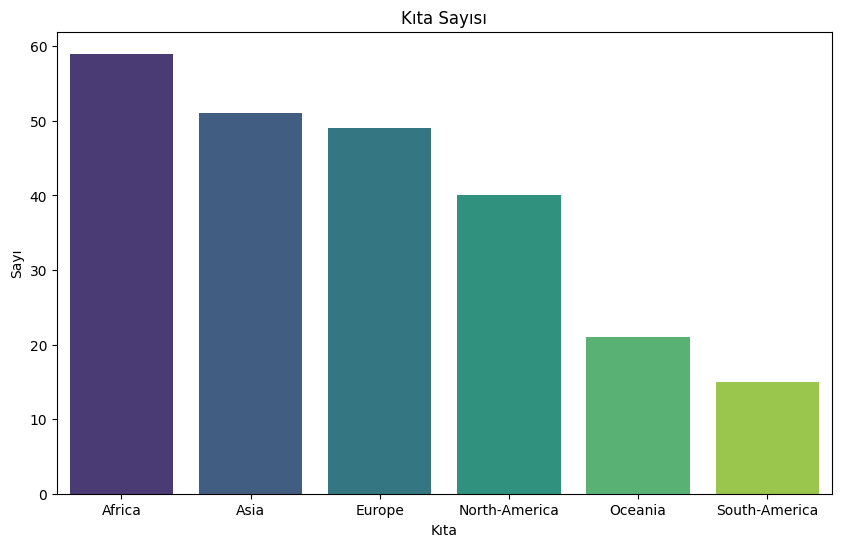

In [31]:
# Her bir kıtanın sayısını alma
value_counts = covid19_df['Continent'].value_counts()

# Çubuk grafik oluşturalım
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.title('Kıta Sayısı')
plt.xlabel('Kıta')
plt.ylabel('Sayı')
plt.show()

In [32]:
# Kıtalara göre aktif vaka sayılarını gruplayarak özetleme ve büyükten küçüğe sıralama
grouped_df = covid19_df.groupby('Continent')['Cases_Active'].sum().reset_index()
sorted_df = grouped_df.sort_values(by='Cases_Active', ascending=False)

In [33]:
sorted_df

,Continent,Cases_Active
1,Asia,1.867612e+07
3,North-America,7.025364e+06
2,Europe,6.717866e+06
5,South-America,3.366343e+06
0,Africa,2.662167e+06
4,Oceania,1.744375e+06


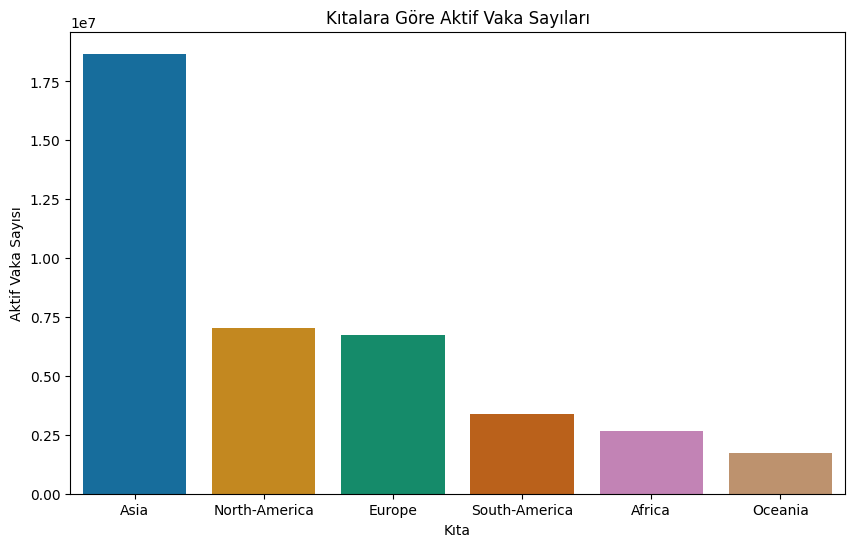

In [34]:
# Kıtalara göre aktif vaka sayıları
plt.figure(figsize=(10, 6))
sns.barplot(x='Continent', y='Cases_Active', data=sorted_df, palette='colorblind')
plt.title('Kıtalara Göre Aktif Vaka Sayıları')
plt.xlabel('Kıta')
plt.ylabel('Aktif Vaka Sayısı')
plt.show()

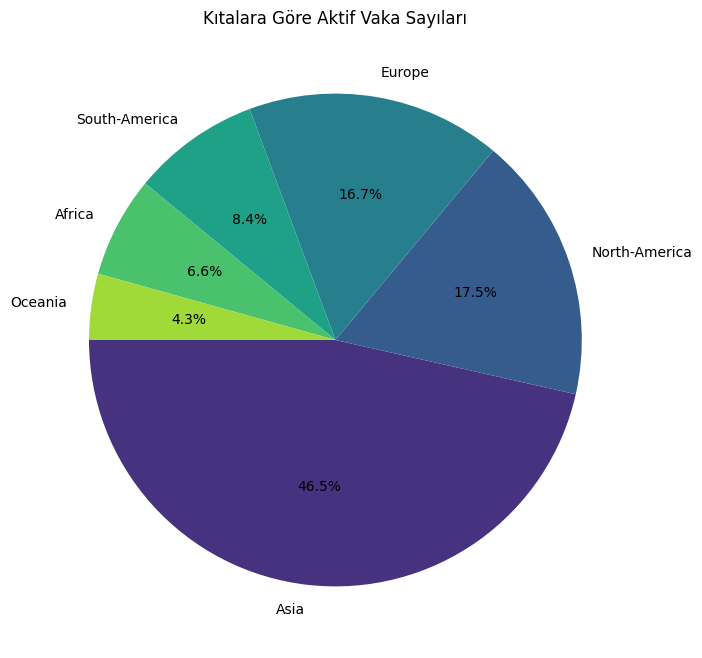

In [35]:
# Pasta grafiği oluşturma
# labels parametresiyle kıtaları, 
# autopct parametresiyle yüzdelik değerleri, 
# startangle parametresiyle pasta diliminin başlangıç açısını, 
# colors parametresiyle renk paleti belirlendi

plt.figure(figsize=(8, 8))
plt.pie(sorted_df['Cases_Active'], labels=sorted_df['Continent'], autopct='%1.1f%%', startangle=180, colors=sns.color_palette('viridis'))
plt.title('Kıtalara Göre Aktif Vaka Sayıları')
plt.show()

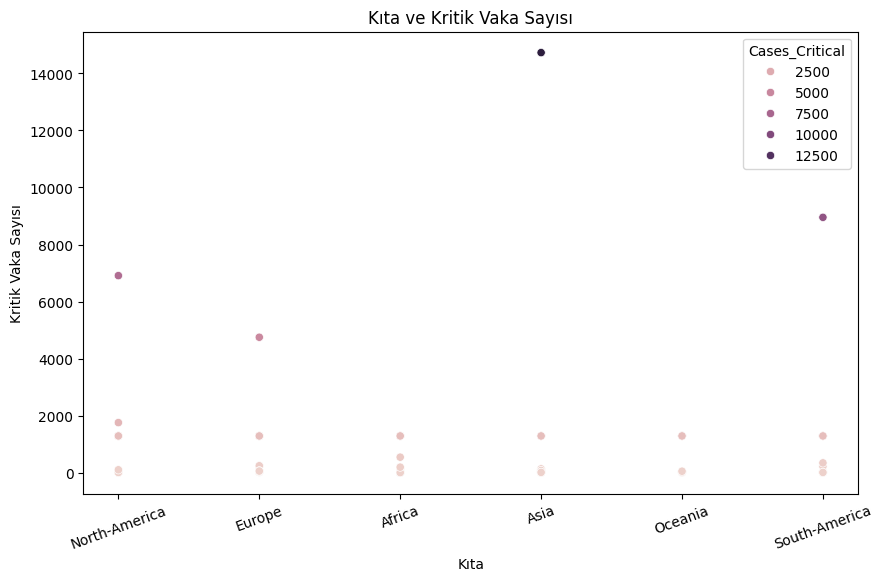

In [36]:
# Scatter plot (Dağılım grafiği) kullanarak kıtalara göre kritik vaka sayıları
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Continent', y='Cases_Critical', data=covid19_df, hue='Cases_Critical')
plt.title('Kıta ve Kritik Vaka Sayısı')
plt.xlabel('Kıta')
plt.ylabel('Kritik Vaka Sayısı')
plt.xticks(rotation=20)  # Eksen etiketlerini döndürmek için
plt.show()


In [37]:
covid19_df.columns

Index(['Continent', 'Country', 'Population', 'Total_Cases', 'Total_Tests',
       'Total_Deaths', 'Cases_Active', 'Cases_Critical', 'Cases_Recovered'],
      dtype='object')

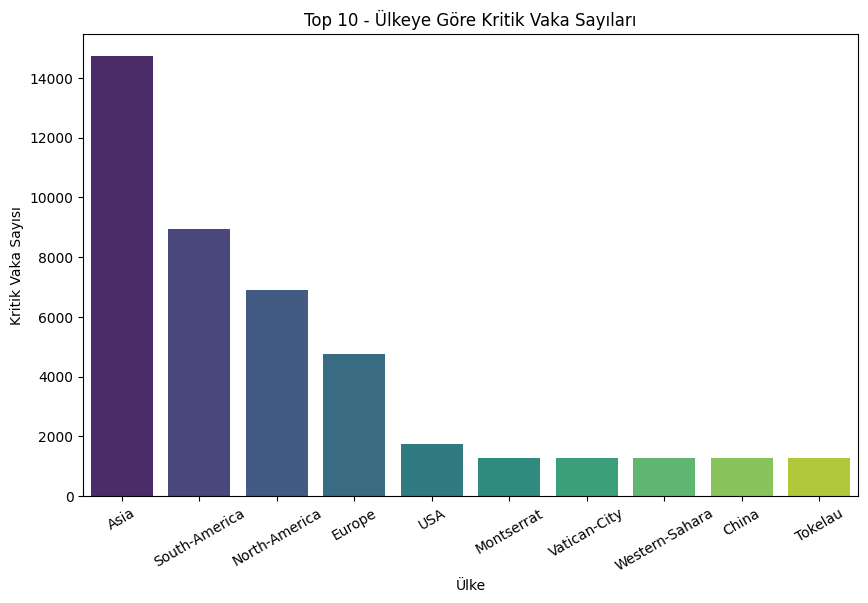

In [38]:
# nlargest fonksiyonu kullanılarak "Cases_Critical" sütununa göre 
# en büyük 10 değeri içeren top_10_countries veri çerçevesi.
top_10_countries = covid19_df.nlargest(10, 'Cases_Critical')

# Çubuk grafiği ile ülkelere göre ölen hasta sayıları
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Cases_Critical', data=top_10_countries, palette='viridis')
plt.title('Top 10 - Ülkeye Göre Kritik Vaka Sayıları')
plt.xlabel('Ülke')
plt.ylabel('Kritik Vaka Sayısı')
plt.xticks(rotation=30)
plt.show()



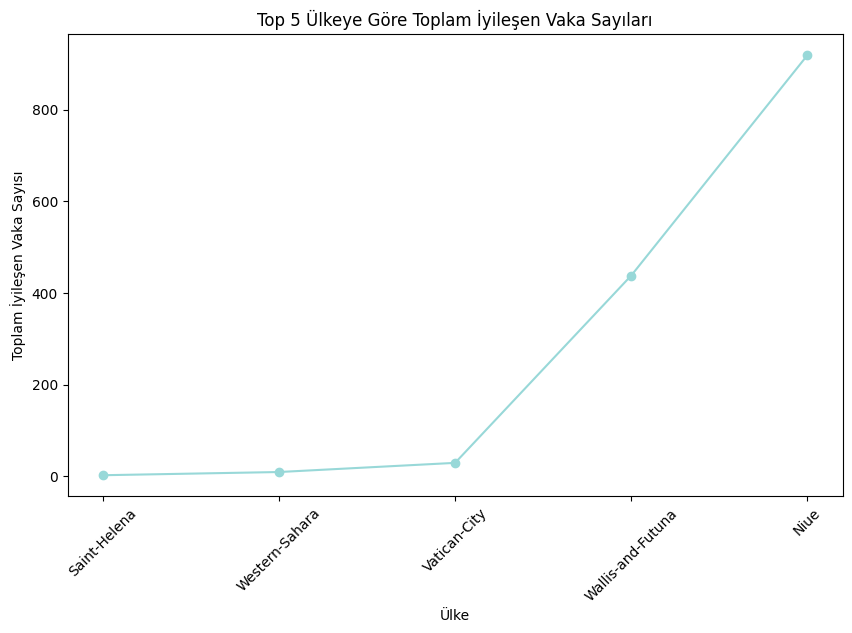

In [39]:
# En küçük 5 ülkeyi seç
top_5_countries = covid19_df.nsmallest(5, 'Cases_Recovered')

# Çizgi grafiği oluştur
plt.figure(figsize=(10, 6))
plt.plot(top_5_countries['Country'], top_5_countries['Cases_Recovered'], marker='o', linestyle='-', color='#98D8D8')
plt.title('Top 5 Ülkeye Göre Toplam İyileşen Vaka Sayıları')
plt.xlabel('Ülke')
plt.ylabel('Toplam İyileşen Vaka Sayısı')
plt.xticks(rotation=45)
plt.show()


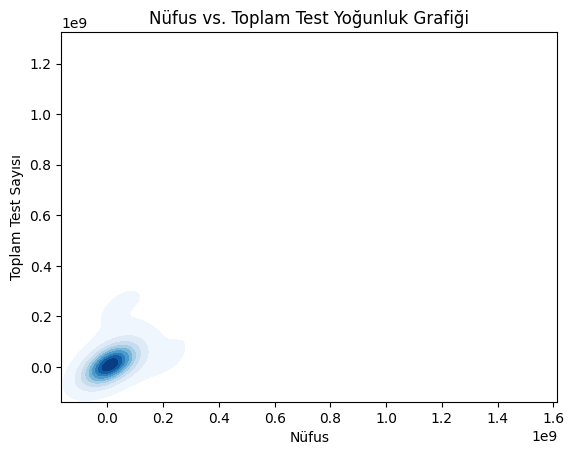

In [40]:
#Yoğunluk grafiği, iki değişken arasındaki dağılımı gösterir.

# Yoğunluk grafiği
sns.kdeplot(data=covid19_df, x='Population', y='Total_Tests', cmap="Blues", fill=True)
plt.title('Nüfus vs. Toplam Test Yoğunluk Grafiği')
plt.xlabel('Nüfus')
plt.ylabel('Toplam Test Sayısı')
plt.show()


# isin() fonksiyonu: bir veri setindeki belirli değerleri filtrelemek veya belirli değerlere sahip satırları seçmek için kullanışlı bir araçtır.


In [86]:
# Belirli ülkeleri seçmek
selected_countries = ['Turkey', 'Germany', 'USA', 'China', 'Tajikistan', 'Vatican-City']
df = covid19_df[covid19_df['Country'].isin(selected_countries)].copy()


# Sıcaklık Haritası Parametrelerinin Açıklanması:
# annot: seaborn kütüphanesinde bir ısı haritası çizildiğinde, her hücrenin içine sayısal değerlerin eklenip eklenmeyeceğini belirleyen bir parametredir.

# cmap (color map):'viridis', sarıdan mora doğru giden bir renk skalasını temsil eder. Bu renk skalası, düşük değerlere sahip bölgeleri sarı, yüksek değerlere sahip bölgeleri ise mor ile gösterir. Bu tür renk skalaları, verilerin büyüklüklerini hızlı ve doğru bir şekilde anlamak için kullanışlıdır.

# Seaborn'daki diğer bazı renk skalaları şunlardır:

- 'plasma': Sarıdan mora giden bir renk skalası.
- 'cividis': Sarıdan siyaha giden bir renk skalası.
- 'inferno': Sarıdan kırmızıya giden bir renk skalası.

 # fmt=".0f" olarak ayarlanırsa, sayılar ondalık kısmı olmadan tam sayı olarak gösterilir. Bu, sayıları daha okunabilir hale getirebilir. fmt parametresi, genellikle bir string formatlama ifadesi alır.

 # linewidths Parametresi: Bu parametre, hücreler arasındaki çizgi kalınlığını (linewidth) belirler. linewidths=0.5 gibi bir değerle ayarlandığında, hücreler arasında ince bir çizgi oluşur. Bu, hücrelerin birbirinden daha iyi ayrılmasına ve görselleştirmenin daha düzenli görünmesine yardımcı olabilir. Eğer bu parametre belirtilmezse veya linewidths=None olarak ayarlanırsa, çizgi kalınlığı varsayılan olarak kullanılır.


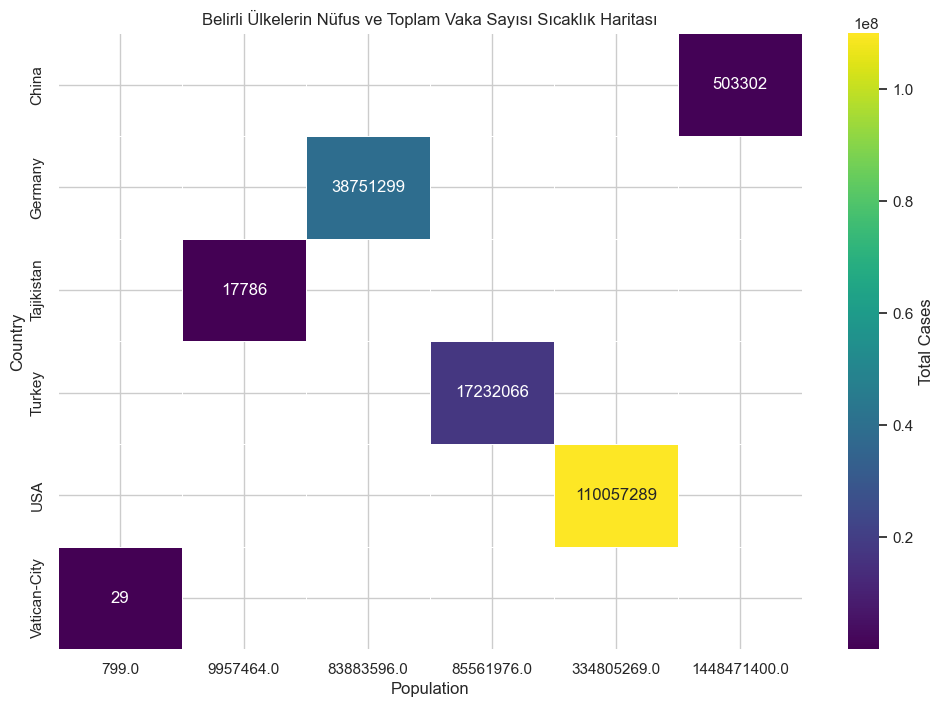

In [96]:
# Sıcaklık haritası çizimi
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

heatmap = sns.heatmap(df.pivot_table(values='Total_Cases', index='Country', columns='Population'),
                      cmap="viridis", annot=True, fmt=".0f", linewidths=.5)

# Renk barının (skalasının) etiketi
heatmap.collections[0].colorbar.set_label("Total Cases")

plt.title('Belirli Ülkelerin Nüfus ve Toplam Vaka Sayısı Sıcaklık Haritası')
plt.show()


# Dairesel Grafik kullanarak kıtalardaki iyişen vaka sayılarını gösterme
- labels parametresi ile kıta adlarını, 
- autopct parametresi ile yüzdelik değerleri, 
- startangle ile başlangıç açısını belirliyoruz. 
- Ayrıca, renkler için colors parametresini plt.cm.Paired.colors ile ayarlıyoruz.


In [101]:
# Kıtlara göre iyileşen vakaların toplamı
grouped_df = covid19_df.groupby('Continent')['Cases_Recovered'].sum().reset_index()


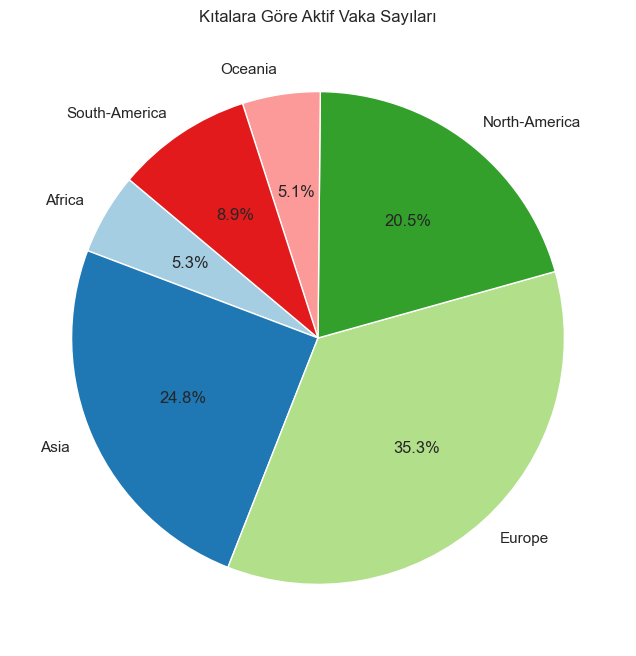

In [104]:
plt.figure(figsize=(8, 8))
plt.pie(grouped_df['Cases_Recovered'], labels=grouped_df['Continent'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Kıtalara Göre İyileşen Hasta Sayıları')
plt.show()

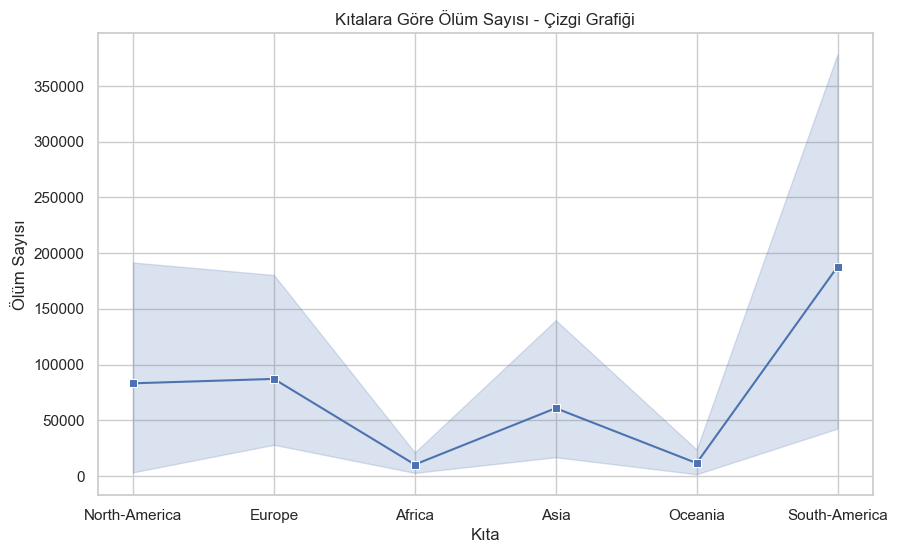

In [121]:
#çizgi grafiği kullanarak kıtlara göre ölen hasta sayısı
plt.figure(figsize=(10, 6))
sns.lineplot(x='Continent', y='Total_Deaths', data=covid19_df, marker='s')

plt.title('Kıtalara Göre Ölüm Sayısı - Çizgi Grafiği')
plt.xlabel('Kıta')
plt.ylabel('Ölüm Sayısı')
plt.show()

#Eğer bu gölgelemeyi kaldırmak istiyorsanız, 
# ci=None (güven aralığı olmadığı anlamına gelir)

# Keman grafiği (violin plot), veri setindeki dağılımı gösteren bir tür kutu grafiğidir. Verilerin yoğunluklarını, merkez eğilimlerini ve dağılımlarını görselleştirmek için kullanılır. 

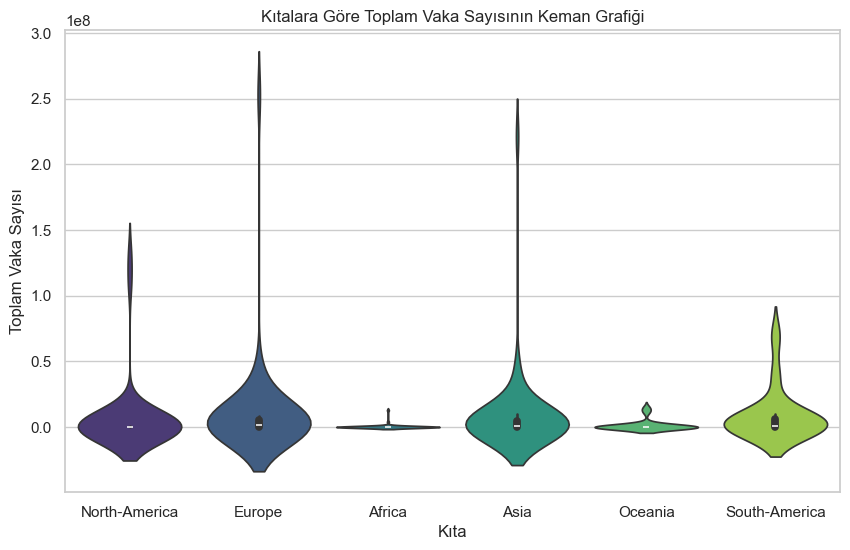

In [122]:

# Keman grafiği ile kıtalara göre toplam vaka sayısı
plt.figure(figsize=(10, 6)) 
sns.violinplot(x='Continent', y='Total_Cases', data=covid19_df, palette='viridis')

plt.title('Kıtalara Göre Toplam Vaka Sayısının Keman Grafiği')
plt.xlabel('Kıta')
plt.ylabel('Toplam Vaka Sayısı')
plt.show()